In [165]:
import numpy as np
import pandas as pd
import cobra.test
import os

from os.path import join

from time import time


from cobra.flux_analysis import (
    single_gene_deletion, single_reaction_deletion, double_gene_deletion,
    double_reaction_deletion)

import cobra
from cobra.test import create_test_model


In [166]:
import FlowCal

s = FlowCal.io.FCSData('04-blank-A2-1.fcs')
print(s.shape)


(7898, 26)


In [167]:
print(s.channels)

('FSC-H', 'FSC-A', 'SSC-H', 'SSC-A', 'FL1-H', 'FL1-A', 'FL2-H', 'FL2-A', 'FL3-H', 'FL3-A', 'FL4-H', 'FL4-A', 'FL5-H', 'FL5-A', 'FL6-H', 'FL6-A', 'FL7-H', 'FL7-A', 'FL8-H', 'FL8-A', 'FL9-H', 'FL9-A', 'FL10-H', 'FL10-A', 'FSC-Width', 'Time')


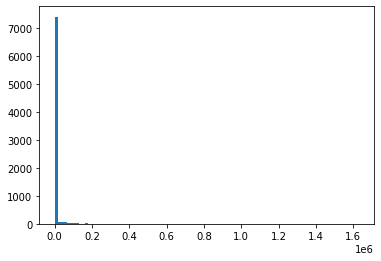

In [168]:
import matplotlib.pyplot as plt
plt.hist(s[:, 'FL1-H'], bins=100)
plt.show()

In [169]:
s_transformed = FlowCal.transform.to_rfi(s, channels='FL1-H')
s_transformed

FCSData([[ 1.24597002e+04,  1.02619995e+03,  3.22200012e+02, ...,
          -5.87000008e+01,  8.43057175e+01,  0.00000000e+00],
         [ 1.01857998e+04,  3.74350000e+03,  1.86500000e+02, ...,
           4.40000000e+01,  3.76408478e+02,  2.51000000e+02],
         [ 1.06314004e+04,  3.81630005e+03,  2.02199997e+02, ...,
          -1.66500000e+02,  3.67759033e+02,  4.11000000e+02],
         ...,
         [ 1.28485996e+04,  1.54265000e+04,  1.62655000e+04, ...,
           2.08199997e+02,  1.22950940e+03,  2.99406200e+06],
         [ 1.36152002e+04,  1.01037002e+04,  1.61409004e+04, ...,
           8.00000000e+01,  7.60286865e+02,  2.99832200e+06],
         [ 1.43940000e+04,  1.14367002e+04,  1.21065996e+04, ...,
          -1.56800003e+02,  8.13678711e+02,  2.99899900e+06]])

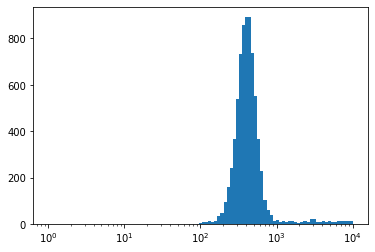

In [170]:
import numpy as np
bins = np.logspace(0, 4, 100)
plt.hist(s_transformed[:, 'FL1-H'], bins=bins)
plt.xscale('log')
plt.show()


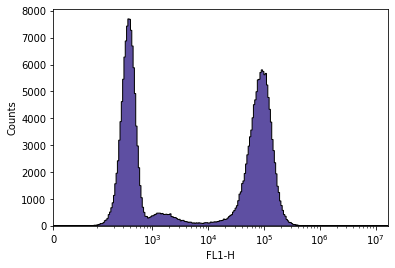

In [171]:
s = FlowCal.io.FCSData('02-blank-A2-1.fcs')
s = FlowCal.transform.to_rfi(s)

FlowCal.plot.hist1d(s, channel='FL1-H')
plt.show()


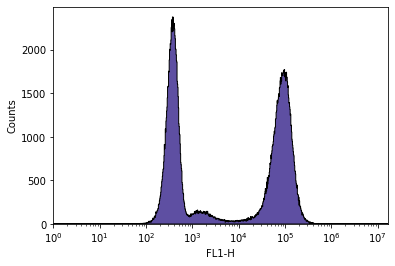

In [172]:
FlowCal.plot.hist1d(s, channel='FL1-H', xscale='log', bins=1024)
plt.show()


In [90]:
from numpy.random import seed
from numpy.random import randn
from numpy.random import lognormal
from scipy.stats import ks_2samp
from scipy import stats

d1 = FlowCal.io.FCSData('02-blank-A2-1.fcs')

#print(d1.shape)

#d1_fl1 = d1[:, ['FL1-H']]
#print(type(d1_fl1))
#print(dir(d1_fl1))
#print(type(d1_fl1.data.tolist()))
#print(d1_fl1.data.tolist()[100])


#print(type(d1[0]))
#print(dir(d1[0]))
#print(len(d1[0]))
#print(d1[0][0])
#d1 = [FlowCal.transform.to_rfi(di) for di in d1]
d1_fl1 = d1[:, ['FL1-H']]
d1_list = d1_fl1.data.tolist()
print(d1_list[0][0])

proper_d1_list = []
for i in range(len(d1_list)):
    proper_d1_list.append(d1_list[i][0])
    
print(proper_d1_list[:100])
print(type(proper_d1_list[:100]))
    
#print(type(d1[0][0]))
#print(dir(d1[0][0]))
#print(len(d1[0][0]))


500.5
[500.5, 259.70001220703125, 422.5, 374.0, 365.5, 320.5, 470.20001220703125, 308.6000061035156, 406.8999938964844, 362.29998779296875, 354.79998779296875, 371.1000061035156, 406.3999938964844, 278.79998779296875, 405.0, 234.1999969482422, 534.4000244140625, 240.39999389648438, 410.5, 494.0, 398.0, 243.0, 407.29998779296875, 351.20001220703125, 586.9000244140625, 201.10000610351562, 271.29998779296875, 401.8999938964844, 391.3999938964844, 317.0, 366.5, 379.70001220703125, 506.79998779296875, 346.79998779296875, 314.6000061035156, 176.5, 263.5, 424.0, 265.20001220703125, 516.4000244140625, 335.79998779296875, 339.8999938964844, 289.5, 408.1000061035156, 402.8999938964844, 399.20001220703125, 170.5, 542.0999755859375, 432.20001220703125, 250.8000030517578, 344.5, 261.5, 483.3999938964844, 413.8999938964844, 412.1000061035156, 199.1999969482422, 340.0, 326.0, 602.9000244140625, 328.70001220703125, 396.1000061035156, 268.0, 215.5, 506.8999938964844, 662.4000244140625, 315.799987792968

In [91]:
d2 = FlowCal.io.FCSData('02-blank-A2-2.fcs')

#d2 = [FlowCal.transform.to_rfi(di) for di in d2]

d2_fl1 = d2[:, ['FL1-H']]
d2_list = d2_fl1.data.tolist()
print(d2_list[0][0])

proper_d2_list = []
for i in range(len(d2_list)):
    proper_d2_list.append(d2_list[i][0])
    
print(proper_d2_list[:100])
print(type(proper_d2_list[:100]))

p = stats.ks_2samp(proper_d1_list, proper_d2_list).pvalue
#print("%f1" % 0.123)
print('{0:.2f}'.format(p))


388.1000061035156
[388.1000061035156, 118833.703125, 365.1000061035156, 514.5, 320.1000061035156, 289.29998779296875, 251.5, 118943.6015625, 240.6999969482422, 290.1000061035156, 370.79998779296875, 91.9000015258789, 429.0, 382.3999938964844, 487.1000061035156, 636.9000244140625, 625.0999755859375, 243.89999389648438, 300.3999938964844, 283.3999938964844, 248.89999389648438, 414.5, 283.3999938964844, 425.8999938964844, 246.89999389648438, 392.70001220703125, 291.29998779296875, 345.20001220703125, 467.79998779296875, 264.1000061035156, 87353.796875, 338.0, 270.8999938964844, 362.20001220703125, 442.8999938964844, 302.79998779296875, 415.29998779296875, 559.7999877929688, 322.5, 565.2000122070312, 466.70001220703125, 424.29998779296875, 185.5, 381.79998779296875, 478.70001220703125, 383.3999938964844, 616.5999755859375, 340.8999938964844, 100892.0, 363.0, 463.1000061035156, 537.5, 315.5, 338.0, 375.3999938964844, 305.29998779296875, 295.5, 229.5, 349.3999938964844, 349.0, 352.8999938964

In [30]:
d3 = FlowCal.io.FCSData('02-blank-A2-3.fcs')

d3_fl1 = d3[:, ['FL1-H']]
d3_list = d3_fl1.data.tolist()
print(d3_list[0][0])

proper_d3_list = []
for i in range(len(d3_list)):
    proper_d3_list.append(d3_list[i][0])
    
print(proper_d3_list[:100])
print(type(proper_d3_list[:100]))

print(stats.ks_2samp(proper_d1_list, proper_d3_list))



d4 = FlowCal.io.FCSData('02-blank-A2-4.fcs')

d4_fl1 = d4[:, ['FL1-H']]
d4_list = d4_fl1.data.tolist()
print(d4_list[0][0])

proper_d4_list = []
for i in range(len(d4_list)):
    proper_d4_list.append(d4_list[i][0])
    
print(proper_d4_list[:100])
print(type(proper_d4_list[:100]))

print(stats.ks_2samp(proper_d1_list, proper_d4_list))

print(stats.ks_2samp(proper_d2_list, proper_d3_list))
print(stats.ks_2samp(proper_d2_list, proper_d4_list))
print(stats.ks_2samp(proper_d3_list, proper_d4_list))


353.8999938964844
[353.8999938964844, 338.0, 391.70001220703125, 568.5999755859375, 415.79998779296875, 434.3999938964844, 384.79998779296875, 290.3999938964844, 189.5, 205.5, 186.8000030517578, 427.3999938964844, 330.20001220703125, 368.8999938964844, 299.5, 236.3000030517578, 574.5999755859375, 247.10000610351562, 171.39999389648438, 278.0, 193.89999389648438, 232.89999389648438, 334.79998779296875, 548.5, 507.5, 323.79998779296875, 329.5, 686.9000244140625, 360.70001220703125, 487.1000061035156, 401.1000061035156, 351.70001220703125, 592.9000244140625, 291.6000061035156, 433.70001220703125, 286.0, 414.5, 450.0, 303.29998779296875, 458.70001220703125, 456.70001220703125, 337.5, 324.20001220703125, 246.5, 333.0, 164.60000610351562, 308.5, 461.5, 207.39999389648438, 271.29998779296875, 308.1000061035156, 288.3999938964844, 357.6000061035156, 517.5, 325.5, 492.8999938964844, 411.6000061035156, 304.1000061035156, 359.79998779296875, 343.0, 355.70001220703125, 428.6000061035156, 448.70001

In [39]:
from numpy.random import seed
from numpy.random import randn
from numpy.random import lognormal
from scipy.stats import ks_2samp
from scipy import stats

d1 = FlowCal.io.FCSData('02-blank-A3-1.fcs')

#print(d1.shape)

#d1_fl1 = d1[:, ['FL1-H']]
#print(type(d1_fl1))
#print(dir(d1_fl1))
#print(type(d1_fl1.data.tolist()))
#print(d1_fl1.data.tolist()[100])


#print(type(d1[0]))
#print(dir(d1[0]))
#print(len(d1[0]))
#print(d1[0][0])
#d1 = [FlowCal.transform.to_rfi(di) for di in d1]
d1_fl1 = d1[:, ['FL1-H']]
d1_list = d1_fl1.data.tolist()
print(d1_list[0][0])

proper_d1_list = []
for i in range(len(d1_list)):
    proper_d1_list.append(d1_list[i][0])
    
print(proper_d1_list[:100])
print(type(proper_d1_list[:100]))
    
#print(type(d1[0][0]))
#print(dir(d1[0][0]))
#print(len(d1[0][0]))

d2 = FlowCal.io.FCSData('02-blank-A3-2.fcs')

#d2 = [FlowCal.transform.to_rfi(di) for di in d2]

d2_fl1 = d2[:, ['FL1-H']]
d2_list = d2_fl1.data.tolist()
print(d2_list[0][0])

proper_d2_list = []
for i in range(len(d2_list)):
    proper_d2_list.append(d2_list[i][0])
    
print(proper_d2_list[:100])
print(type(proper_d2_list[:100]))

stats.ks_2samp(proper_d1_list, proper_d2_list)


183549.796875
[183549.796875, 200225.296875, 251791.09375, 162743.703125, 362330.40625, 197018.0, 327545.6875, 3259.5, 413688.40625, 5252.7001953125, 423374.90625, 148772.09375, 410514.1875, 207122.203125, 161079.5, 270599.1875, 2991.0, 102027.3984375, 6421.89990234375, 68298.296875, 358.1000061035156, 244365.796875, 2972.60009765625, 173921.40625, 6094.60009765625, 2448.60009765625, 406.0, 284738.1875, 399.79998779296875, 161100.703125, 683461.8125, 417.29998779296875, 631.0999755859375, 327.70001220703125, 410.3999938964844, 458.0, 411417.6875, 450365.8125, 513.2999877929688, 511.1000061035156, 445.79998779296875, 553.2999877929688, 391.1000061035156, 247.6999969482422, 498.3999938964844, 322.0, 305.70001220703125, 339.5, 280.3999938964844, 716.7000122070312, 326.8999938964844, 412.1000061035156, 346.20001220703125, 314.20001220703125, 301.79998779296875, 361.29998779296875, 303.1000061035156, 199.6999969482422, 482.3999938964844, 458.0, 449.70001220703125, 403.5, 317.29998779296875,

KstestResult(statistic=0.22081588616410486, pvalue=0.0, statistic_location=895.2000122070312, statistic_sign=-1)

In [40]:
d3 = FlowCal.io.FCSData('02-blank-A3-3.fcs')

d3_fl1 = d3[:, ['FL1-H']]
d3_list = d3_fl1.data.tolist()
print(d3_list[0][0])

proper_d3_list = []
for i in range(len(d3_list)):
    proper_d3_list.append(d3_list[i][0])
    
print(proper_d3_list[:100])
print(type(proper_d3_list[:100]))

print(stats.ks_2samp(proper_d1_list, proper_d3_list))



d4 = FlowCal.io.FCSData('02-blank-A3-4.fcs')

d4_fl1 = d4[:, ['FL1-H']]
d4_list = d4_fl1.data.tolist()
print(d4_list[0][0])

proper_d4_list = []
for i in range(len(d4_list)):
    proper_d4_list.append(d4_list[i][0])
    
print(proper_d4_list[:100])
print(type(proper_d4_list[:100]))

print(stats.ks_2samp(proper_d1_list, proper_d4_list))

print(stats.ks_2samp(proper_d2_list, proper_d3_list))
print(stats.ks_2samp(proper_d2_list, proper_d4_list))
print(stats.ks_2samp(proper_d3_list, proper_d4_list))


306.70001220703125
[306.70001220703125, 514.0999755859375, 413.0, 327.3999938964844, 344.8999938964844, 353.6000061035156, 372.79998779296875, 379.6000061035156, 344.6000061035156, 421.5, 271.29998779296875, 365.3999938964844, 410.5, 312217.8125, 570.0999755859375, 445.70001220703125, 205.89999389648438, 217.10000610351562, 198138.703125, 341.29998779296875, 498.0, 293.5, 493.20001220703125, 200.10000610351562, 204.3000030517578, 380.8999938964844, 458.29998779296875, 413.3999938964844, 233850.40625, 244.6999969482422, 479.70001220703125, 391.5, 173478.796875, 447.29998779296875, 249.3000030517578, 228.0, 331.8999938964844, 346.3999938964844, 280.0, 349.5, 341.6000061035156, 339.6000061035156, 323.0, 148983.796875, 328.0, 210.0, 169.39999389648438, 106.0999984741211, 128.60000610351562, 326379.3125, 388.0, 450.1000061035156, 321.8999938964844, 269.0, 210.10000610351562, 264.6000061035156, 115684.6015625, 446.3999938964844, 258.8999938964844, 321.5, 388057.59375, 413.0, 447.100006103515

In [41]:
from numpy.random import seed
from numpy.random import randn
from numpy.random import lognormal
from scipy.stats import ks_2samp
from scipy import stats

d1 = FlowCal.io.FCSData('02-blank-A4-1.fcs')

#print(d1.shape)

#d1_fl1 = d1[:, ['FL1-H']]
#print(type(d1_fl1))
#print(dir(d1_fl1))
#print(type(d1_fl1.data.tolist()))
#print(d1_fl1.data.tolist()[100])


#print(type(d1[0]))
#print(dir(d1[0]))
#print(len(d1[0]))
#print(d1[0][0])
#d1 = [FlowCal.transform.to_rfi(di) for di in d1]
d1_fl1 = d1[:, ['FL1-H']]
d1_list = d1_fl1.data.tolist()
print(d1_list[0][0])

proper_d1_list = []
for i in range(len(d1_list)):
    proper_d1_list.append(d1_list[i][0])
    
print(proper_d1_list[:100])
print(type(proper_d1_list[:100]))
    
#print(type(d1[0][0]))
#print(dir(d1[0][0]))
#print(len(d1[0][0]))

d2 = FlowCal.io.FCSData('02-blank-A4-2.fcs')

#d2 = [FlowCal.transform.to_rfi(di) for di in d2]

d2_fl1 = d2[:, ['FL1-H']]
d2_list = d2_fl1.data.tolist()
print(d2_list[0][0])

proper_d2_list = []
for i in range(len(d2_list)):
    proper_d2_list.append(d2_list[i][0])
    
print(proper_d2_list[:100])
print(type(proper_d2_list[:100]))

stats.ks_2samp(proper_d1_list, proper_d2_list)


413796.0
[413796.0, 184962.09375, 253538.90625, 401.3999938964844, 163260.09375, 263491.5, 325.1000061035156, 167701.59375, 377.79998779296875, 197251.796875, 91738.8984375, 64629.19921875, 335593.09375, 394.3999938964844, 198397.203125, 343.3999938964844, 174383.703125, 128113.6015625, 294.20001220703125, 470382.59375, 6102.2001953125, 220829.40625, 302.79998779296875, 361126.8125, 245634.296875, 45643.3984375, 612.5999755859375, 74189.6015625, 164483.296875, 345.29998779296875, 574.9000244140625, 257194.203125, 315.3999938964844, 235193.296875, 175575.90625, 94517.5, 168069.203125, 152537.09375, 487.0, 195475.296875, 388.5, 401.6000061035156, 217275.296875, 246.10000610351562, 249419.90625, 432.20001220703125, 501.5, 176157.203125, 227988.09375, 461.79998779296875, 376.20001220703125, 372.3999938964844, 188093.796875, 1660.9000244140625, 325.70001220703125, 152292.703125, 586.0, 187735.796875, 159098.0, 458.0, 356.6000061035156, 247965.59375, 242442.703125, 240109.0, 348.799987792968

KstestResult(statistic=0.34329023593692704, pvalue=0.0, statistic_location=790.7000122070312, statistic_sign=1)

In [42]:
d3 = FlowCal.io.FCSData('02-blank-A4-3.fcs')

d3_fl1 = d3[:, ['FL1-H']]
d3_list = d3_fl1.data.tolist()
print(d3_list[0][0])

proper_d3_list = []
for i in range(len(d3_list)):
    proper_d3_list.append(d3_list[i][0])
    
print(proper_d3_list[:100])
print(type(proper_d3_list[:100]))

print(stats.ks_2samp(proper_d1_list, proper_d3_list))



d4 = FlowCal.io.FCSData('02-blank-A4-4.fcs')

d4_fl1 = d4[:, ['FL1-H']]
d4_list = d4_fl1.data.tolist()
print(d4_list[0][0])

proper_d4_list = []
for i in range(len(d4_list)):
    proper_d4_list.append(d4_list[i][0])
    
print(proper_d4_list[:100])
print(type(proper_d4_list[:100]))

print(stats.ks_2samp(proper_d1_list, proper_d4_list))

print(stats.ks_2samp(proper_d2_list, proper_d3_list))
print(stats.ks_2samp(proper_d2_list, proper_d4_list))
print(stats.ks_2samp(proper_d3_list, proper_d4_list))


464.8999938964844
[464.8999938964844, 311.70001220703125, 429.6000061035156, 329.1000061035156, 290.70001220703125, 339.0, 395.5, 314.5, 418.1000061035156, 391.79998779296875, 371.3999938964844, 486.5, 241.5, 277.20001220703125, 345836.59375, 317.8999938964844, 449.79998779296875, 332.1000061035156, 378.8999938964844, 273.6000061035156, 349.20001220703125, 488.3999938964844, 522.5999755859375, 405.5, 456.0, 404.5, 361.0, 560.7999877929688, 410.70001220703125, 348.3999938964844, 291.8999938964844, 99356.3984375, 190.3000030517578, 441.0, 232132.0, 519.2999877929688, 744.2999877929688, 275.0, 373.29998779296875, 150121.0, 376.0, 342.3999938964844, 578.2999877929688, 312.3999938964844, 342.1000061035156, 264.8999938964844, 382.8999938964844, 321.70001220703125, 179.39999389648438, 424.8999938964844, 383.70001220703125, 373.6000061035156, 313.1000061035156, 361738.6875, 547.0, 491.5, 330.5, 394.1000061035156, 335.79998779296875, 259.3999938964844, 230.5, 124833.5, 437.20001220703125, 436.6

In [43]:
from numpy.random import seed
from numpy.random import randn
from numpy.random import lognormal
from scipy.stats import ks_2samp
from scipy import stats

d1 = FlowCal.io.FCSData('02-blank-A5-1.fcs')

#print(d1.shape)

#d1_fl1 = d1[:, ['FL1-H']]
#print(type(d1_fl1))
#print(dir(d1_fl1))
#print(type(d1_fl1.data.tolist()))
#print(d1_fl1.data.tolist()[100])


#print(type(d1[0]))
#print(dir(d1[0]))
#print(len(d1[0]))
#print(d1[0][0])
#d1 = [FlowCal.transform.to_rfi(di) for di in d1]
d1_fl1 = d1[:, ['FL1-H']]
d1_list = d1_fl1.data.tolist()
print(d1_list[0][0])

proper_d1_list = []
for i in range(len(d1_list)):
    proper_d1_list.append(d1_list[i][0])
    
print(proper_d1_list[:100])
print(type(proper_d1_list[:100]))
    
#print(type(d1[0][0]))
#print(dir(d1[0][0]))
#print(len(d1[0][0]))

d2 = FlowCal.io.FCSData('02-blank-A5-2.fcs')

#d2 = [FlowCal.transform.to_rfi(di) for di in d2]

d2_fl1 = d2[:, ['FL1-H']]
d2_list = d2_fl1.data.tolist()
print(d2_list[0][0])

proper_d2_list = []
for i in range(len(d2_list)):
    proper_d2_list.append(d2_list[i][0])
    
print(proper_d2_list[:100])
print(type(proper_d2_list[:100]))

stats.ks_2samp(proper_d1_list, proper_d2_list)


223826.203125
[223826.203125, 251391.703125, 235766.703125, 141411.203125, 96501.796875, 446740.90625, 245771.796875, 564.5, 1747.300048828125, 69110.203125, 260874.203125, 288494.3125, 212112.09375, 394.6000061035156, 311.6000061035156, 500.3999938964844, 323.5, 58548.69921875, 225326.40625, 426.8999938964844, 205985.5, 194600.296875, 300.20001220703125, 516.2000122070312, 414.0, 121283.0, 411.29998779296875, 182573.90625, 547.5999755859375, 521.0, 331223.90625, 184731.90625, 8943.7001953125, 326779.0, 131975.40625, 120536.796875, 342.3999938964844, 187262.5, 55764.30078125, 270.79998779296875, 230546.09375, 372.3999938964844, 318242.59375, 243766.796875, 282.0, 287599.09375, 174230.203125, 368.0, 438.79998779296875, 332455.3125, 489.70001220703125, 486.29998779296875, 168819.09375, 160756.40625, 473.6000061035156, 282791.0, 501.1000061035156, 373.1000061035156, 365.20001220703125, 117413.796875, 112633.203125, 133398.796875, 168852.90625, 299.79998779296875, 307415.40625, 474.3999938

KstestResult(statistic=0.49837875827449796, pvalue=0.0, statistic_location=199614.5, statistic_sign=1)

In [44]:
d3 = FlowCal.io.FCSData('02-blank-A5-3.fcs')

d3_fl1 = d3[:, ['FL1-H']]
d3_list = d3_fl1.data.tolist()
print(d3_list[0][0])

proper_d3_list = []
for i in range(len(d3_list)):
    proper_d3_list.append(d3_list[i][0])
    
print(proper_d3_list[:100])
print(type(proper_d3_list[:100]))

print(stats.ks_2samp(proper_d1_list, proper_d3_list))



d4 = FlowCal.io.FCSData('02-blank-A5-4.fcs')

d4_fl1 = d4[:, ['FL1-H']]
d4_list = d4_fl1.data.tolist()
print(d4_list[0][0])

proper_d4_list = []
for i in range(len(d4_list)):
    proper_d4_list.append(d4_list[i][0])
    
print(proper_d4_list[:100])
print(type(proper_d4_list[:100]))

print(stats.ks_2samp(proper_d1_list, proper_d4_list))

print(stats.ks_2samp(proper_d2_list, proper_d3_list))
print(stats.ks_2samp(proper_d2_list, proper_d4_list))
print(stats.ks_2samp(proper_d3_list, proper_d4_list))


319.1000061035156
[319.1000061035156, 464.5, 401.5, 210.89999389648438, 340.3999938964844, 316.5, 247.0, 460.6000061035156, 262.70001220703125, 415.0, 719.5, 282.79998779296875, 280.3999938964844, 381.3999938964844, 346.20001220703125, 370.8999938964844, 298.3999938964844, 266.29998779296875, 307.20001220703125, 373.8999938964844, 365.29998779296875, 392.0, 540.7000122070312, 407.70001220703125, 539.7000122070312, 279.29998779296875, 471.70001220703125, 281.1000061035156, 379.0, 420.1000061035156, 352.0, 486.0, 162.60000610351562, 253.8000030517578, 459.3999938964844, 237.8000030517578, 425.6000061035156, 387.5, 549.7999877929688, 444.3999938964844, 346.3999938964844, 377.20001220703125, 401.6000061035156, 305.0, 456.8999938964844, 327.70001220703125, 359.6000061035156, 281.29998779296875, 313.29998779296875, 462.29998779296875, 451.70001220703125, 537.0999755859375, 524.2999877929688, 455.20001220703125, 342.8999938964844, 246.10000610351562, 375.5, 336.1000061035156, 506.0, 250.69999

In [45]:
from numpy.random import seed
from numpy.random import randn
from numpy.random import lognormal
from scipy.stats import ks_2samp
from scipy import stats

d1 = FlowCal.io.FCSData('02-blank-A6-1.fcs')

#print(d1.shape)

#d1_fl1 = d1[:, ['FL1-H']]
#print(type(d1_fl1))
#print(dir(d1_fl1))
#print(type(d1_fl1.data.tolist()))
#print(d1_fl1.data.tolist()[100])


#print(type(d1[0]))
#print(dir(d1[0]))
#print(len(d1[0]))
#print(d1[0][0])
#d1 = [FlowCal.transform.to_rfi(di) for di in d1]
d1_fl1 = d1[:, ['FL1-H']]
d1_list = d1_fl1.data.tolist()
print(d1_list[0][0])

proper_d1_list = []
for i in range(len(d1_list)):
    proper_d1_list.append(d1_list[i][0])
    
print(proper_d1_list[:100])
print(type(proper_d1_list[:100]))
    
#print(type(d1[0][0]))
#print(dir(d1[0][0]))
#print(len(d1[0][0]))

d2 = FlowCal.io.FCSData('02-blank-A6-2.fcs')

#d2 = [FlowCal.transform.to_rfi(di) for di in d2]

d2_fl1 = d2[:, ['FL1-H']]
d2_list = d2_fl1.data.tolist()
print(d2_list[0][0])

proper_d2_list = []
for i in range(len(d2_list)):
    proper_d2_list.append(d2_list[i][0])
    
print(proper_d2_list[:100])
print(type(proper_d2_list[:100]))

stats.ks_2samp(proper_d1_list, proper_d2_list)


106591.796875
[106591.796875, 56711.69921875, 93192.8984375, 17158.80078125, 68374.8984375, 72367.296875, 46391.8984375, 199869.703125, 85822.3984375, 54510.19921875, 71435.5, 27219.5, 116520.5, 71819.5, 85086.296875, 126597.796875, 59018.80078125, 40398.6015625, 75773.703125, 99722.203125, 36425.5, 48468.8984375, 51370.6015625, 16351.7998046875, 104862.8984375, 58332.1015625, 91668.203125, 364.29998779296875, 109349.296875, 80609.703125, 57001.6015625, 16454.900390625, 20797.599609375, 152022.703125, 78111.0, 176118.796875, 50831.0, 406.8999938964844, 1527.800048828125, 46591.69921875, 62328.8984375, 103326.796875, 71326.8984375, 64319.30078125, 89199.8984375, 81453.703125, 325430.40625, 3742.199951171875, 50139.5, 53603.5, 59448.5, 68651.5, 50702.30078125, 76109.796875, 386.79998779296875, 172334.59375, 109349.703125, 250.1999969482422, 40657.5, 42708.8984375, 1986.5999755859375, 49079.80078125, 58310.8984375, 67228.1015625, 460.20001220703125, 58404.30078125, 124413.296875, 449.7000

KstestResult(statistic=0.6596413668106668, pvalue=0.0, statistic_location=118718.0, statistic_sign=1)

In [46]:
d3 = FlowCal.io.FCSData('02-blank-A6-3.fcs')

d3_fl1 = d3[:, ['FL1-H']]
d3_list = d3_fl1.data.tolist()
print(d3_list[0][0])

proper_d3_list = []
for i in range(len(d3_list)):
    proper_d3_list.append(d3_list[i][0])
    
print(proper_d3_list[:100])
print(type(proper_d3_list[:100]))

print(stats.ks_2samp(proper_d1_list, proper_d3_list))



d4 = FlowCal.io.FCSData('02-blank-A6-4.fcs')

d4_fl1 = d4[:, ['FL1-H']]
d4_list = d4_fl1.data.tolist()
print(d4_list[0][0])

proper_d4_list = []
for i in range(len(d4_list)):
    proper_d4_list.append(d4_list[i][0])
    
print(proper_d4_list[:100])
print(type(proper_d4_list[:100]))

print(stats.ks_2samp(proper_d1_list, proper_d4_list))

print(stats.ks_2samp(proper_d2_list, proper_d3_list))
print(stats.ks_2samp(proper_d2_list, proper_d4_list))
print(stats.ks_2samp(proper_d3_list, proper_d4_list))


253.1999969482422
[253.1999969482422, 366.1000061035156, 226.10000610351562, 492.6000061035156, 265.29998779296875, 462.0, 429.6000061035156, 259.5, 416.20001220703125, 481.29998779296875, 211.60000610351562, 299.79998779296875, 308.20001220703125, 501.70001220703125, 380.70001220703125, 483.1000061035156, 299.0, 205.3000030517578, 254.60000610351562, 207.0, 461.3999938964844, 450.79998779296875, 294.8999938964844, 293.1000061035156, 343.3999938964844, 394.1000061035156, 302.3999938964844, 332.5, 363.3999938964844, 408.70001220703125, 401.0, 623.7000122070312, 510.8999938964844, 599.5, 454.1000061035156, 364.29998779296875, 318.0, 180.10000610351562, 406.29998779296875, 463.8999938964844, 391.8999938964844, 404.1000061035156, 244.10000610351562, 233.6999969482422, 407.0, 361.79998779296875, 349.1000061035156, 368.79998779296875, 463.29998779296875, 343.79998779296875, 333.20001220703125, 395.0, 337.5, 406.70001220703125, 403.79998779296875, 527.2999877929688, 360.20001220703125, 298.60

In [47]:
from numpy.random import seed
from numpy.random import randn
from numpy.random import lognormal
from scipy.stats import ks_2samp
from scipy import stats

d1 = FlowCal.io.FCSData('02-blank-A7-1.fcs')

#print(d1.shape)

#d1_fl1 = d1[:, ['FL1-H']]
#print(type(d1_fl1))
#print(dir(d1_fl1))
#print(type(d1_fl1.data.tolist()))
#print(d1_fl1.data.tolist()[100])


#print(type(d1[0]))
#print(dir(d1[0]))
#print(len(d1[0]))
#print(d1[0][0])
#d1 = [FlowCal.transform.to_rfi(di) for di in d1]
d1_fl1 = d1[:, ['FL1-H']]
d1_list = d1_fl1.data.tolist()
print(d1_list[0][0])

proper_d1_list = []
for i in range(len(d1_list)):
    proper_d1_list.append(d1_list[i][0])
    
print(proper_d1_list[:100])
print(type(proper_d1_list[:100]))
    
#print(type(d1[0][0]))
#print(dir(d1[0][0]))
#print(len(d1[0][0]))

d2 = FlowCal.io.FCSData('02-blank-A7-2.fcs')

#d2 = [FlowCal.transform.to_rfi(di) for di in d2]

d2_fl1 = d2[:, ['FL1-H']]
d2_list = d2_fl1.data.tolist()
print(d2_list[0][0])

proper_d2_list = []
for i in range(len(d2_list)):
    proper_d2_list.append(d2_list[i][0])
    
print(proper_d2_list[:100])
print(type(proper_d2_list[:100]))

stats.ks_2samp(proper_d1_list, proper_d2_list)


62854.0
[62854.0, 185333.296875, 73340.703125, 113520.5, 102104.703125, 15632.7998046875, 91579.296875, 146236.59375, 113463.796875, 105253.3984375, 103522.796875, 124228.6015625, 82172.203125, 435.70001220703125, 88035.8984375, 116966.0, 70147.5, 79265.6015625, 113345.1015625, 91390.5, 94385.6015625, 90191.703125, 300.79998779296875, 85410.0, 578.5999755859375, 53502.0, 2725.300048828125, 93180.703125, 61336.5, 85464.703125, 78200.796875, 87939.296875, 109340.6015625, 152775.796875, 80573.3984375, 52482.80078125, 86934.0, 147133.296875, 127892.703125, 133256.5, 121576.703125, 144480.796875, 92571.296875, 1628.5999755859375, 63783.80078125, 37685.3984375, 120554.796875, 1436.5999755859375, 108876.203125, 100811.703125, 1347.9000244140625, 116534.0, 73315.5, 139793.59375, 88529.1015625, 89886.5, 152049.59375, 77191.703125, 68004.796875, 47042.0, 58778.6015625, 54630.8984375, 73554.8984375, 82079.796875, 114613.6015625, 105182.296875, 72578.6015625, 110136.6015625, 60721.8984375, 156984.

KstestResult(statistic=0.291413820394136, pvalue=0.0, statistic_location=941.2000122070312, statistic_sign=-1)

In [48]:
d3 = FlowCal.io.FCSData('02-blank-A7-3.fcs')

d3_fl1 = d3[:, ['FL1-H']]
d3_list = d3_fl1.data.tolist()
print(d3_list[0][0])

proper_d3_list = []
for i in range(len(d3_list)):
    proper_d3_list.append(d3_list[i][0])
    
print(proper_d3_list[:100])
print(type(proper_d3_list[:100]))

print(stats.ks_2samp(proper_d1_list, proper_d3_list))



d4 = FlowCal.io.FCSData('02-blank-A7-4.fcs')

d4_fl1 = d4[:, ['FL1-H']]
d4_list = d4_fl1.data.tolist()
print(d4_list[0][0])

proper_d4_list = []
for i in range(len(d4_list)):
    proper_d4_list.append(d4_list[i][0])
    
print(proper_d4_list[:100])
print(type(proper_d4_list[:100]))

print(stats.ks_2samp(proper_d1_list, proper_d4_list))

print(stats.ks_2samp(proper_d2_list, proper_d3_list))
print(stats.ks_2samp(proper_d2_list, proper_d4_list))
print(stats.ks_2samp(proper_d3_list, proper_d4_list))


187.39999389648438
[187.39999389648438, 195.6999969482422, 445.8999938964844, 438.29998779296875, 499.0, 439.5, 497.1000061035156, 194.39999389648438, 225.60000610351562, 296.5, 575.7000122070312, 444.8999938964844, 363.20001220703125, 357.8999938964844, 391.20001220703125, 320.1000061035156, 310.79998779296875, 576.4000244140625, 558.9000244140625, 419.29998779296875, 429.5, 541.5999755859375, 212.3000030517578, 226.39999389648438, 347.1000061035156, 249.6999969482422, 421.1000061035156, 420.70001220703125, 331.70001220703125, 552.4000244140625, 461.20001220703125, 444.6000061035156, 259.20001220703125, 364.3999938964844, 301.5, 247.60000610351562, 319.29998779296875, 217.5, 347.6000061035156, 254.60000610351562, 258.29998779296875, 334.8999938964844, 395.3999938964844, 319.1000061035156, 381.1000061035156, 416.70001220703125, 410.5, 515.5999755859375, 482.0, 281.29998779296875, 379.5, 272.0, 398.70001220703125, 238.1999969482422, 288.6000061035156, 395.6000061035156, 357.600006103515

In [49]:
from numpy.random import seed
from numpy.random import randn
from numpy.random import lognormal
from scipy.stats import ks_2samp
from scipy import stats

d1 = FlowCal.io.FCSData('02-blank-A8-1.fcs')

#print(d1.shape)

#d1_fl1 = d1[:, ['FL1-H']]
#print(type(d1_fl1))
#print(dir(d1_fl1))
#print(type(d1_fl1.data.tolist()))
#print(d1_fl1.data.tolist()[100])


#print(type(d1[0]))
#print(dir(d1[0]))
#print(len(d1[0]))
#print(d1[0][0])
#d1 = [FlowCal.transform.to_rfi(di) for di in d1]
d1_fl1 = d1[:, ['FL1-H']]
d1_list = d1_fl1.data.tolist()
print(d1_list[0][0])

proper_d1_list = []
for i in range(len(d1_list)):
    proper_d1_list.append(d1_list[i][0])
    
print(proper_d1_list[:100])
print(type(proper_d1_list[:100]))
    
#print(type(d1[0][0]))
#print(dir(d1[0][0]))
#print(len(d1[0][0]))

d2 = FlowCal.io.FCSData('02-blank-A8-2.fcs')

#d2 = [FlowCal.transform.to_rfi(di) for di in d2]

d2_fl1 = d2[:, ['FL1-H']]
d2_list = d2_fl1.data.tolist()
print(d2_list[0][0])

proper_d2_list = []
for i in range(len(d2_list)):
    proper_d2_list.append(d2_list[i][0])
    
print(proper_d2_list[:100])
print(type(proper_d2_list[:100]))

stats.ks_2samp(proper_d1_list, proper_d2_list)


332.1000061035156
[332.1000061035156, 338.8999938964844, 333.29998779296875, 461.3999938964844, 258.3999938964844, 378.29998779296875, 226.0, 542.7000122070312, 177.3000030517578, 35071.69921875, 414.8999938964844, 245.60000610351562, 379.20001220703125, 575.2000122070312, 8958.400390625, 363.0, 388.1000061035156, 468.6000061035156, 409.3999938964844, 282.79998779296875, 353.70001220703125, 514.5, 50866.1015625, 543.4000244140625, 406.29998779296875, 422.5, 374.3999938964844, 360.0, 421.8999938964844, 414.0, 846.7999877929688, 309.5, 385.3999938964844, 34661.19921875, 337.1000061035156, 264.6000061035156, 31404.69921875, 38560.0, 302.0, 304.6000061035156, 331.79998779296875, 2900.10009765625, 307.1000061035156, 361.29998779296875, 253.89999389648438, 234.1999969482422, 26318.099609375, 25219.69921875, 472.70001220703125, 53691.1015625, 446.1000061035156, 383.0, 433.79998779296875, 386.8999938964844, 256.70001220703125, 439.0, 48494.6015625, 519.0, 394.0, 358.29998779296875, 209.6999969

KstestResult(statistic=0.3278764180711055, pvalue=0.0, statistic_location=27717.400390625, statistic_sign=-1)

In [50]:
d3 = FlowCal.io.FCSData('02-blank-A8-3.fcs')

d3_fl1 = d3[:, ['FL1-H']]
d3_list = d3_fl1.data.tolist()
print(d3_list[0][0])

proper_d3_list = []
for i in range(len(d3_list)):
    proper_d3_list.append(d3_list[i][0])
    
print(proper_d3_list[:100])
print(type(proper_d3_list[:100]))

print(stats.ks_2samp(proper_d1_list, proper_d3_list))



d4 = FlowCal.io.FCSData('02-blank-A8-4.fcs')

d4_fl1 = d4[:, ['FL1-H']]
d4_list = d4_fl1.data.tolist()
print(d4_list[0][0])

proper_d4_list = []
for i in range(len(d4_list)):
    proper_d4_list.append(d4_list[i][0])
    
print(proper_d4_list[:100])
print(type(proper_d4_list[:100]))

print(stats.ks_2samp(proper_d1_list, proper_d4_list))

print(stats.ks_2samp(proper_d2_list, proper_d3_list))
print(stats.ks_2samp(proper_d2_list, proper_d4_list))
print(stats.ks_2samp(proper_d3_list, proper_d4_list))


236.1999969482422
[236.1999969482422, 403.70001220703125, 488.0, 417.8999938964844, 228.10000610351562, 465.8999938964844, 341.20001220703125, 363.6000061035156, 428.70001220703125, 355.70001220703125, 18148.19921875, 218.10000610351562, 387.5, 366.79998779296875, 453.79998779296875, 625.5, 486.20001220703125, 418.29998779296875, 606.0999755859375, 533.7999877929688, 213.5, 362.20001220703125, 682.7000122070312, 434.8999938964844, 315.8999938964844, 282.70001220703125, 325.8999938964844, 323.20001220703125, 317.3999938964844, 222.0, 611.7999877929688, 380.3999938964844, 449.1000061035156, 292.8999938964844, 277.1000061035156, 309.70001220703125, 399.79998779296875, 305.8999938964844, 308.29998779296875, 31070.19921875, 599.2000122070312, 432.8999938964844, 442.1000061035156, 283.6000061035156, 252.89999389648438, 322.8999938964844, 455.3999938964844, 285.0, 20091.19921875, 762.0, 387.3999938964844, 345.70001220703125, 435.0, 549.5999755859375, 357.20001220703125, 324.1000061035156, 486

In [51]:
from numpy.random import seed
from numpy.random import randn
from numpy.random import lognormal
from scipy.stats import ks_2samp
from scipy import stats

d1 = FlowCal.io.FCSData('02-blank-A9-1.fcs')

#print(d1.shape)

#d1_fl1 = d1[:, ['FL1-H']]
#print(type(d1_fl1))
#print(dir(d1_fl1))
#print(type(d1_fl1.data.tolist()))
#print(d1_fl1.data.tolist()[100])


#print(type(d1[0]))
#print(dir(d1[0]))
#print(len(d1[0]))
#print(d1[0][0])
#d1 = [FlowCal.transform.to_rfi(di) for di in d1]
d1_fl1 = d1[:, ['FL1-H']]
d1_list = d1_fl1.data.tolist()
print(d1_list[0][0])

proper_d1_list = []
for i in range(len(d1_list)):
    proper_d1_list.append(d1_list[i][0])
    
print(proper_d1_list[:100])
print(type(proper_d1_list[:100]))
    
#print(type(d1[0][0]))
#print(dir(d1[0][0]))
#print(len(d1[0][0]))

d2 = FlowCal.io.FCSData('02-blank-A9-2.fcs')

#d2 = [FlowCal.transform.to_rfi(di) for di in d2]

d2_fl1 = d2[:, ['FL1-H']]
d2_list = d2_fl1.data.tolist()
print(d2_list[0][0])

proper_d2_list = []
for i in range(len(d2_list)):
    proper_d2_list.append(d2_list[i][0])
    
print(proper_d2_list[:100])
print(type(proper_d2_list[:100]))

stats.ks_2samp(proper_d1_list, proper_d2_list)


60349.5
[60349.5, 64059.69921875, 63657.19921875, 71207.1015625, 58820.1015625, 99795.796875, 135797.5, 75797.6015625, 59661.8984375, 76694.8984375, 54955.0, 43633.8984375, 99486.8984375, 59519.3984375, 384.8999938964844, 166355.203125, 62831.8984375, 62722.80078125, 265.6000061035156, 165151.09375, 189793.796875, 72146.1015625, 91708.296875, 476.79998779296875, 55898.0, 68729.296875, 241909.09375, 46867.5, 130342.203125, 62589.80078125, 6059.0, 62967.19921875, 413.70001220703125, 6894.89990234375, 75475.703125, 71239.1015625, 6497.10009765625, 67200.6015625, 86883.296875, 176156.0, 28897.400390625, 349.5, 66659.703125, 66177.203125, 139015.09375, 38092.1015625, 1667.800048828125, 48373.5, 97725.6015625, 106605.8984375, 70950.8984375, 65779.0, 60209.8984375, 113766.8984375, 118903.3984375, 496.8999938964844, 58827.19921875, 8223.900390625, 13722.7998046875, 30633.599609375, 59847.1015625, 85513.796875, 71722.1015625, 127156.296875, 57532.80078125, 68522.0, 66337.296875, 79253.1015625, 

KstestResult(statistic=0.4627010526459031, pvalue=0.0, statistic_location=746.7000122070312, statistic_sign=-1)

In [52]:
d3 = FlowCal.io.FCSData('02-blank-A9-3.fcs')

d3_fl1 = d3[:, ['FL1-H']]
d3_list = d3_fl1.data.tolist()
print(d3_list[0][0])

proper_d3_list = []
for i in range(len(d3_list)):
    proper_d3_list.append(d3_list[i][0])
    
print(proper_d3_list[:100])
print(type(proper_d3_list[:100]))

print(stats.ks_2samp(proper_d1_list, proper_d3_list))



d4 = FlowCal.io.FCSData('02-blank-A9-4.fcs')

d4_fl1 = d4[:, ['FL1-H']]
d4_list = d4_fl1.data.tolist()
print(d4_list[0][0])

proper_d4_list = []
for i in range(len(d4_list)):
    proper_d4_list.append(d4_list[i][0])
    
print(proper_d4_list[:100])
print(type(proper_d4_list[:100]))

print(stats.ks_2samp(proper_d1_list, proper_d4_list))

print(stats.ks_2samp(proper_d2_list, proper_d3_list))
print(stats.ks_2samp(proper_d2_list, proper_d4_list))
print(stats.ks_2samp(proper_d3_list, proper_d4_list))


306.3999938964844
[306.3999938964844, 433.29998779296875, 531.9000244140625, 419.6000061035156, 28077.900390625, 475.3999938964844, 336.6000061035156, 373.70001220703125, 502.1000061035156, 298.8999938964844, 440.29998779296875, 299.20001220703125, 431.29998779296875, 394.20001220703125, 483.5, 353.70001220703125, 54806.80078125, 336.5, 430.3999938964844, 326.8999938964844, 90304.796875, 453.1000061035156, 228.89999389648438, 320.20001220703125, 623.5999755859375, 541.5, 348.6000061035156, 214.6999969482422, 261.70001220703125, 349.70001220703125, 344.0, 257.29998779296875, 301.3999938964844, 513.7999877929688, 359.79998779296875, 580.2000122070312, 268.29998779296875, 338.5, 340.79998779296875, 489.70001220703125, 425.6000061035156, 427.79998779296875, 313.3999938964844, 369.0, 395.0, 420.8999938964844, 484.8999938964844, 407.79998779296875, 481.20001220703125, 275.5, 212.89999389648438, 427.6000061035156, 280.20001220703125, 341.1000061035156, 306.0, 416.3999938964844, 420.1000061035

In [53]:
from numpy.random import seed
from numpy.random import randn
from numpy.random import lognormal
from scipy.stats import ks_2samp
from scipy import stats

d1 = FlowCal.io.FCSData('02-blank-A10-1.fcs')

#print(d1.shape)

#d1_fl1 = d1[:, ['FL1-H']]
#print(type(d1_fl1))
#print(dir(d1_fl1))
#print(type(d1_fl1.data.tolist()))
#print(d1_fl1.data.tolist()[100])


#print(type(d1[0]))
#print(dir(d1[0]))
#print(len(d1[0]))
#print(d1[0][0])
#d1 = [FlowCal.transform.to_rfi(di) for di in d1]
d1_fl1 = d1[:, ['FL1-H']]
d1_list = d1_fl1.data.tolist()
print(d1_list[0][0])

proper_d1_list = []
for i in range(len(d1_list)):
    proper_d1_list.append(d1_list[i][0])
    
print(proper_d1_list[:100])
print(type(proper_d1_list[:100]))
    
#print(type(d1[0][0]))
#print(dir(d1[0][0]))
#print(len(d1[0][0]))

d2 = FlowCal.io.FCSData('02-blank-A10-2.fcs')

#d2 = [FlowCal.transform.to_rfi(di) for di in d2]

d2_fl1 = d2[:, ['FL1-H']]
d2_list = d2_fl1.data.tolist()
print(d2_list[0][0])

proper_d2_list = []
for i in range(len(d2_list)):
    proper_d2_list.append(d2_list[i][0])
    
print(proper_d2_list[:100])
print(type(proper_d2_list[:100]))

stats.ks_2samp(proper_d1_list, proper_d2_list)


55003.69921875
[55003.69921875, 385129.3125, 471841.8125, 107392.796875, 135533.796875, 68773.296875, 58724.1015625, 134524.5, 248175.40625, 164985.203125, 337359.0, 2018.9000244140625, 30781.900390625, 225495.59375, 56939.30078125, 403744.1875, 308464.59375, 285541.90625, 92253.0, 288507.40625, 115501.0, 395045.0, 753281.6875, 58367.0, 232274.5, 122292.0, 208203.703125, 309019.6875, 114862.5, 264698.3125, 88388.0, 243392.90625, 263306.0, 138531.703125, 167110.40625, 477613.59375, 286362.40625, 173969.203125, 451.79998779296875, 160975.5, 290139.6875, 225289.796875, 585.7000122070312, 34271.3984375, 239398.90625, 122931.203125, 153588.296875, 190714.90625, 123068.6015625, 282118.09375, 257073.0, 251525.90625, 101428.203125, 171265.90625, 163770.40625, 2636.60009765625, 5940.7001953125, 88664.796875, 105905.1015625, 150263.59375, 214357.40625, 216912.5, 278021.90625, 502671.8125, 2912.60009765625, 349329.8125, 181661.0, 280086.0, 287599.3125, 7631.10009765625, 9376.599609375, 269015.687

KstestResult(statistic=0.6461046787109049, pvalue=0.0, statistic_location=834.4000244140625, statistic_sign=-1)

In [54]:
d3 = FlowCal.io.FCSData('02-blank-A10-3.fcs')

d3_fl1 = d3[:, ['FL1-H']]
d3_list = d3_fl1.data.tolist()
print(d3_list[0][0])

proper_d3_list = []
for i in range(len(d3_list)):
    proper_d3_list.append(d3_list[i][0])
    
print(proper_d3_list[:100])
print(type(proper_d3_list[:100]))

print(stats.ks_2samp(proper_d1_list, proper_d3_list))



d4 = FlowCal.io.FCSData('02-blank-A10-4.fcs')

d4_fl1 = d4[:, ['FL1-H']]
d4_list = d4_fl1.data.tolist()
print(d4_list[0][0])

proper_d4_list = []
for i in range(len(d4_list)):
    proper_d4_list.append(d4_list[i][0])
    
print(proper_d4_list[:100])
print(type(proper_d4_list[:100]))

print(stats.ks_2samp(proper_d1_list, proper_d4_list))

print(stats.ks_2samp(proper_d2_list, proper_d3_list))
print(stats.ks_2samp(proper_d2_list, proper_d4_list))
print(stats.ks_2samp(proper_d3_list, proper_d4_list))


306328.59375
[306328.59375, 254.89999389648438, 3511.699951171875, 344.5, 536767.625, 364.8999938964844, 305487.3125, 660332.625, 355199.59375, 354933.1875, 795108.3125, 584940.1875, 922646.1875, 347602.40625, 139398.0, 3998.699951171875, 248327.5, 400947.5, 496262.59375, 3099.199951171875, 976.9000244140625, 400100.6875, 398842.1875, 300581.59375, 339.29998779296875, 94269.1015625, 292667.3125, 473646.90625, 196942.0, 4957.39990234375, 412956.09375, 49787.0, 3716.89990234375, 631171.375, 498.3999938964844, 11063.5, 222229.5, 330347.0, 962298.125, 2765.199951171875, 499007.1875, 292062.59375, 757636.0, 105121.703125, 419897.09375, 288579.8125, 346050.40625, 449367.40625, 230971.90625, 2957.0, 290563.09375, 357.5, 68173.3984375, 752708.625, 283606.8125, 297049.59375, 464116.6875, 441.8999938964844, 123.0999984741211, 102127.703125, 3137.0, 52568.69921875, 444444.0, 327.1000061035156, 1007788.6875, 499.5, 1043.9000244140625, 270144.40625, 690823.125, 162184.0, 331.6000061035156, 263130.9

In [55]:
from numpy.random import seed
from numpy.random import randn
from numpy.random import lognormal
from scipy.stats import ks_2samp
from scipy import stats

d1 = FlowCal.io.FCSData('02-blank-A11-1.fcs')

#print(d1.shape)

#d1_fl1 = d1[:, ['FL1-H']]
#print(type(d1_fl1))
#print(dir(d1_fl1))
#print(type(d1_fl1.data.tolist()))
#print(d1_fl1.data.tolist()[100])


#print(type(d1[0]))
#print(dir(d1[0]))
#print(len(d1[0]))
#print(d1[0][0])
#d1 = [FlowCal.transform.to_rfi(di) for di in d1]
d1_fl1 = d1[:, ['FL1-H']]
d1_list = d1_fl1.data.tolist()
print(d1_list[0][0])

proper_d1_list = []
for i in range(len(d1_list)):
    proper_d1_list.append(d1_list[i][0])
    
print(proper_d1_list[:100])
print(type(proper_d1_list[:100]))
    
#print(type(d1[0][0]))
#print(dir(d1[0][0]))
#print(len(d1[0][0]))

d2 = FlowCal.io.FCSData('02-blank-A11-2.fcs')

#d2 = [FlowCal.transform.to_rfi(di) for di in d2]

d2_fl1 = d2[:, ['FL1-H']]
d2_list = d2_fl1.data.tolist()
print(d2_list[0][0])

proper_d2_list = []
for i in range(len(d2_list)):
    proper_d2_list.append(d2_list[i][0])
    
print(proper_d2_list[:100])
print(type(proper_d2_list[:100]))

stats.ks_2samp(proper_d1_list, proper_d2_list)


58921.80078125
[58921.80078125, 75926.8984375, 1165.5999755859375, 56746.6015625, 82279.5, 120998.796875, 34519.6015625, 109878.6015625, 106432.796875, 100451.6015625, 1363.0999755859375, 1068.0, 114265.6015625, 519.7999877929688, 74081.0, 257704.40625, 133113.203125, 120584.8984375, 86733.296875, 52991.69921875, 293.1000061035156, 78895.796875, 111131.8984375, 96340.3984375, 99654.203125, 177099.59375, 61866.3984375, 97663.203125, 99470.8984375, 184682.09375, 65328.19921875, 167701.796875, 113430.296875, 157117.40625, 373.79998779296875, 672.9000244140625, 77398.796875, 96054.5, 42076.30078125, 411.0, 478.1000061035156, 164196.59375, 284.29998779296875, 130712.1015625, 261.0, 51866.0, 16985.80078125, 92709.703125, 79199.3984375, 2183.60009765625, 85519.296875, 75631.796875, 48601.3984375, 121009.3984375, 25511.19921875, 74480.8984375, 43314.1015625, 46987.30078125, 506.20001220703125, 43432.19921875, 204.0, 102441.296875, 455.5, 118483.296875, 367.8999938964844, 129429.8984375, 32158.

KstestResult(statistic=0.07469927896600115, pvalue=0.0, statistic_location=142398.796875, statistic_sign=1)

In [56]:
d3 = FlowCal.io.FCSData('02-blank-A11-3.fcs')

d3_fl1 = d3[:, ['FL1-H']]
d3_list = d3_fl1.data.tolist()
print(d3_list[0][0])

proper_d3_list = []
for i in range(len(d3_list)):
    proper_d3_list.append(d3_list[i][0])
    
print(proper_d3_list[:100])
print(type(proper_d3_list[:100]))

print(stats.ks_2samp(proper_d1_list, proper_d3_list))



d4 = FlowCal.io.FCSData('02-blank-A11-4.fcs')

d4_fl1 = d4[:, ['FL1-H']]
d4_list = d4_fl1.data.tolist()
print(d4_list[0][0])

proper_d4_list = []
for i in range(len(d4_list)):
    proper_d4_list.append(d4_list[i][0])
    
print(proper_d4_list[:100])
print(type(proper_d4_list[:100]))

print(stats.ks_2samp(proper_d1_list, proper_d4_list))

print(stats.ks_2samp(proper_d2_list, proper_d3_list))
print(stats.ks_2samp(proper_d2_list, proper_d4_list))
print(stats.ks_2samp(proper_d3_list, proper_d4_list))


286462.6875
[286462.6875, 2423.699951171875, 137192.296875, 107554.296875, 147841.296875, 101790.3984375, 346218.8125, 104523.5, 125449.0, 273100.40625, 49563.6015625, 105013.296875, 175626.0, 73794.6015625, 203896.40625, 74086.8984375, 137483.296875, 165446.59375, 2274.0, 128959.5, 63193.0, 120487.5, 119388.3984375, 146395.0, 935.0999755859375, 197767.90625, 113054.796875, 248186.40625, 220606.296875, 104482.0, 103717.1015625, 116092.703125, 334841.09375, 127432.296875, 1865.9000244140625, 124438.0, 51778.0, 118563.6015625, 3218.60009765625, 103531.796875, 192801.59375, 73817.5, 515.2999877929688, 174578.296875, 159927.09375, 107266.703125, 107787.1015625, 113654.8984375, 97377.8984375, 66574.5, 127516.6015625, 120314.6015625, 21106.599609375, 347500.09375, 115755.6015625, 79526.0, 104018.203125, 206849.09375, 189793.0, 118144.3984375, 173370.90625, 236164.703125, 81877.6015625, 188546.5, 70628.0, 141084.5, 105344.6015625, 51701.30078125, 139932.59375, 68316.3984375, 249854.0, 314057.

In [57]:
from numpy.random import seed
from numpy.random import randn
from numpy.random import lognormal
from scipy.stats import ks_2samp
from scipy import stats

d1 = FlowCal.io.FCSData('02-blank-C2-1.fcs')

#print(d1.shape)

#d1_fl1 = d1[:, ['FL1-H']]
#print(type(d1_fl1))
#print(dir(d1_fl1))
#print(type(d1_fl1.data.tolist()))
#print(d1_fl1.data.tolist()[100])


#print(type(d1[0]))
#print(dir(d1[0]))
#print(len(d1[0]))
#print(d1[0][0])
#d1 = [FlowCal.transform.to_rfi(di) for di in d1]
d1_fl1 = d1[:, ['FL1-H']]
d1_list = d1_fl1.data.tolist()
print(d1_list[0][0])

proper_d1_list = []
for i in range(len(d1_list)):
    proper_d1_list.append(d1_list[i][0])
    
print(proper_d1_list[:100])
print(type(proper_d1_list[:100]))
    
#print(type(d1[0][0]))
#print(dir(d1[0][0]))
#print(len(d1[0][0]))

d2 = FlowCal.io.FCSData('02-blank-C2-2.fcs')

#d2 = [FlowCal.transform.to_rfi(di) for di in d2]

d2_fl1 = d2[:, ['FL1-H']]
d2_list = d2_fl1.data.tolist()
print(d2_list[0][0])

proper_d2_list = []
for i in range(len(d2_list)):
    proper_d2_list.append(d2_list[i][0])
    
print(proper_d2_list[:100])
print(type(proper_d2_list[:100]))

stats.ks_2samp(proper_d1_list, proper_d2_list)


435.6000061035156
[435.6000061035156, 165999.90625, 13375.5, 338501.8125, 550.4000244140625, 526376.8125, 417625.40625, 253610.09375, 267257.59375, 595644.3125, 126444.8984375, 299.70001220703125, 142708.40625, 153950.296875, 226839.59375, 212905.90625, 447.5, 438810.90625, 147959.0, 442.29998779296875, 335072.6875, 257506.90625, 276.0, 554400.875, 311.0, 128683.8984375, 427145.0, 918.5, 645324.875, 285681.90625, 221160.40625, 163496.703125, 95527.8984375, 118069.6015625, 572521.375, 305979.40625, 525607.375, 103542.296875, 218161.5, 231653.90625, 348.0, 405507.1875, 173497.59375, 84933.796875, 425.8999938964844, 196099.5, 102764.203125, 376111.09375, 369398.40625, 124204.796875, 395037.0, 235957.703125, 373.79998779296875, 345.3999938964844, 224414.703125, 151303.40625, 163445.59375, 363.8999938964844, 366640.40625, 161385.59375, 80112.1015625, 50659.30078125, 286.0, 551685.1875, 211257.5, 197432.5, 26774.80078125, 173263.796875, 300.0, 121097.1015625, 538198.8125, 139787.796875, 1498

KstestResult(statistic=0.33251390136645426, pvalue=0.0, statistic_location=814.0999755859375, statistic_sign=-1)

In [58]:
d3 = FlowCal.io.FCSData('02-blank-C2-3.fcs')

d3_fl1 = d3[:, ['FL1-H']]
d3_list = d3_fl1.data.tolist()
print(d3_list[0][0])

proper_d3_list = []
for i in range(len(d3_list)):
    proper_d3_list.append(d3_list[i][0])
    
print(proper_d3_list[:100])
print(type(proper_d3_list[:100]))

print(stats.ks_2samp(proper_d1_list, proper_d3_list))



d4 = FlowCal.io.FCSData('02-blank-C2-4.fcs')

d4_fl1 = d4[:, ['FL1-H']]
d4_list = d4_fl1.data.tolist()
print(d4_list[0][0])

proper_d4_list = []
for i in range(len(d4_list)):
    proper_d4_list.append(d4_list[i][0])
    
print(proper_d4_list[:100])
print(type(proper_d4_list[:100]))

print(stats.ks_2samp(proper_d1_list, proper_d4_list))

print(stats.ks_2samp(proper_d2_list, proper_d3_list))
print(stats.ks_2samp(proper_d2_list, proper_d4_list))
print(stats.ks_2samp(proper_d3_list, proper_d4_list))


368.0
[368.0, 312.0, 368.6000061035156, 175.39999389648438, 367.6000061035156, 361.29998779296875, 301.20001220703125, 481.20001220703125, 408.0, 328.0, 352.6000061035156, 236744.0, 368.0, 368.6000061035156, 31767.400390625, 249503.59375, 349073.3125, 469.20001220703125, 353.20001220703125, 392715.5, 473.1000061035156, 469.79998779296875, 295433.1875, 194142.09375, 501438.59375, 374.3999938964844, 412.8999938964844, 685.0999755859375, 532.2000122070312, 99463.6015625, 444032.3125, 203684.5, 494700.40625, 424.79998779296875, 5381.7998046875, 300.8999938964844, 265531.09375, 401863.5, 703463.875, 712309.6875, 704270.0, 24819.0, 213997.703125, 189508.40625, 492.1000061035156, 450.29998779296875, 202396.796875, 6678.7001953125, 246971.296875, 456803.3125, 198679.703125, 343874.0, 309618.5, 259608.0, 108320.0, 300896.59375, 289607.40625, 263175.59375, 395329.3125, 357.20001220703125, 262761.1875, 234667.5, 88145.1015625, 209013.796875, 353985.1875, 578958.125, 152062.59375, 234102.40625, 27

In [60]:
from numpy.random import seed
from numpy.random import randn
from numpy.random import lognormal
from scipy.stats import ks_2samp
from scipy import stats

d1 = FlowCal.io.FCSData('02-blank-C3-1.fcs')

#print(d1.shape)

#d1_fl1 = d1[:, ['FL1-H']]
#print(type(d1_fl1))
#print(dir(d1_fl1))
#print(type(d1_fl1.data.tolist()))
#print(d1_fl1.data.tolist()[100])


#print(type(d1[0]))
#print(dir(d1[0]))
#print(len(d1[0]))
#print(d1[0][0])
#d1 = [FlowCal.transform.to_rfi(di) for di in d1]
d1_fl1 = d1[:, ['FL1-H']]
d1_list = d1_fl1.data.tolist()
print(d1_list[0][0])

proper_d1_list = []
for i in range(len(d1_list)):
    proper_d1_list.append(d1_list[i][0])
    
print(proper_d1_list[:100])
print(type(proper_d1_list[:100]))
    
#print(type(d1[0][0]))
#print(dir(d1[0][0]))
#print(len(d1[0][0]))

d2 = FlowCal.io.FCSData('02-blank-C3-2.fcs')

#d2 = [FlowCal.transform.to_rfi(di) for di in d2]

d2_fl1 = d2[:, ['FL1-H']]
d2_list = d2_fl1.data.tolist()
print(d2_list[0][0])

proper_d2_list = []
for i in range(len(d2_list)):
    proper_d2_list.append(d2_list[i][0])
    
print(proper_d2_list[:100])
print(type(proper_d2_list[:100]))

stats.ks_2samp(proper_d1_list, proper_d2_list)


83257.796875
[83257.796875, 701.5, 352.20001220703125, 615.5, 328.20001220703125, 314.29998779296875, 364.8999938964844, 20833.0, 555.0999755859375, 278.6000061035156, 404.20001220703125, 75760.0, 427.29998779296875, 430.5, 386.0, 490.1000061035156, 176.1999969482422, 317.8999938964844, 247.1999969482422, 350.6000061035156, 224.6999969482422, 306.5, 438.20001220703125, 446.29998779296875, 110706.703125, 259.5, 327.70001220703125, 354.0, 445.20001220703125, 441.6000061035156, 1940.5999755859375, 202.3000030517578, 324.20001220703125, 295.29998779296875, 296.79998779296875, 180166.703125, 416.6000061035156, 350.8999938964844, 506.0, 175697.40625, 21985.599609375, 162278.09375, 408.8999938964844, 366.3999938964844, 153615.90625, 75797.6015625, 141737.59375, 11214.7001953125, 179516.40625, 366.29998779296875, 200710.5, 530.7999877929688, 275.0, 424.8999938964844, 387.5, 339.70001220703125, 547.0, 1270.300048828125, 417.5, 402.20001220703125, 237050.0, 375.29998779296875, 327.6000061035156,

KstestResult(statistic=0.24524289340381922, pvalue=0.0, statistic_location=816.7999877929688, statistic_sign=1)

In [61]:
d3 = FlowCal.io.FCSData('02-blank-C3-3.fcs')

d3_fl1 = d3[:, ['FL1-H']]
d3_list = d3_fl1.data.tolist()
print(d3_list[0][0])

proper_d3_list = []
for i in range(len(d3_list)):
    proper_d3_list.append(d3_list[i][0])
    
print(proper_d3_list[:100])
print(type(proper_d3_list[:100]))

print(stats.ks_2samp(proper_d1_list, proper_d3_list))



d4 = FlowCal.io.FCSData('02-blank-C3-4.fcs')

d4_fl1 = d4[:, ['FL1-H']]
d4_list = d4_fl1.data.tolist()
print(d4_list[0][0])

proper_d4_list = []
for i in range(len(d4_list)):
    proper_d4_list.append(d4_list[i][0])
    
print(proper_d4_list[:100])
print(type(proper_d4_list[:100]))

print(stats.ks_2samp(proper_d1_list, proper_d4_list))

print(stats.ks_2samp(proper_d2_list, proper_d3_list))
print(stats.ks_2samp(proper_d2_list, proper_d4_list))
print(stats.ks_2samp(proper_d3_list, proper_d4_list))


394718.09375
[394718.09375, 24133.599609375, 356.3999938964844, 183145.09375, 150217.296875, 156234.796875, 233896.703125, 412088.09375, 153852.90625, 142256.203125, 243681.90625, 186602.203125, 957.0999755859375, 252682.0, 91576.796875, 197673.796875, 229573.796875, 168322.5, 380639.8125, 214636.59375, 222940.5, 214335.203125, 150243.0, 221555.203125, 157573.40625, 186893.90625, 204030.203125, 192456.09375, 153638.0, 484362.5, 206495.09375, 17410.599609375, 475216.6875, 205765.796875, 481.79998779296875, 227123.296875, 212583.90625, 321376.59375, 491.70001220703125, 89331.203125, 286652.40625, 159525.296875, 639.4000244140625, 1857.300048828125, 629443.8125, 498097.5, 120442.3984375, 590701.0, 205046.90625, 349404.5, 283631.0, 157602.203125, 232819.40625, 276307.6875, 260.6000061035156, 125680.1015625, 234251.5, 30776.0, 200325.5, 298292.1875, 198844.90625, 230002.296875, 199879.296875, 194445.90625, 190168.5, 560545.625, 20431.599609375, 100884.296875, 225334.90625, 11096.400390625, 

In [183]:
from numpy.random import seed
from numpy.random import randn
from numpy.random import lognormal
from scipy.stats import ks_2samp
from scipy import stats

d1 = FlowCal.io.FCSData('02-blank-C4-1.fcs')

#print(d1.shape)

#d1_fl1 = d1[:, ['FL1-H']]
#print(type(d1_fl1))
#print(dir(d1_fl1))
#print(type(d1_fl1.data.tolist()))
#print(d1_fl1.data.tolist()[100])


#print(type(d1[0]))
#print(dir(d1[0]))
#print(len(d1[0]))
#print(d1[0][0])
#d1 = [FlowCal.transform.to_rfi(di) for di in d1]
d1_fl1 = d1[:, ['FL1-H']]
d1_list = d1_fl1.data.tolist()
print(d1_list[0][0])

proper_d1_list = []
for i in range(len(d1_list)):
    proper_d1_list.append(d1_list[i][0])
    
print(proper_d1_list[:100])
print(type(proper_d1_list[:100]))
    
#print(type(d1[0][0]))
#print(dir(d1[0][0]))
#print(len(d1[0][0]))

d2 = FlowCal.io.FCSData('02-blank-C4-2.fcs')

#d2 = [FlowCal.transform.to_rfi(di) for di in d2]

d2_fl1 = d2[:, ['FL1-H']]
d2_list = d2_fl1.data.tolist()
print(d2_list[0][0])

proper_d2_list = []
for i in range(len(d2_list)):
    proper_d2_list.append(d2_list[i][0])
    
print(proper_d2_list[:100])
print(type(proper_d2_list[:100]))

stats.ks_2samp(proper_d1_list, proper_d2_list)


84671.3984375
[84671.3984375, 55325.6015625, 160013.5, 446.29998779296875, 289.29998779296875, 244.6999969482422, 145377.0, 290.1000061035156, 343.3999938964844, 330309.59375, 509.5, 177742.296875, 417.29998779296875, 129212.703125, 7289.0, 258.1000061035156, 318.20001220703125, 247662.59375, 757.5, 338.0, 331.70001220703125, 415.3999938964844, 443.8999938964844, 603.5, 9895.5, 431.79998779296875, 430.5, 238093.90625, 238304.796875, 51463.1015625, 206551.40625, 157605.59375, 381.5, 414.29998779296875, 94329.296875, 119663.3984375, 162797.59375, 54861.5, 554470.3125, 44393.30078125, 191676.703125, 32505.0, 303954.09375, 66838.203125, 534.5999755859375, 25757.5, 61890.0, 194595.703125, 167.39999389648438, 235875.90625, 395.5, 439.5, 206167.796875, 176918.5, 88293.8984375, 289696.8125, 243543.09375, 184908.59375, 222113.90625, 232851.5, 341940.5, 43240.6015625, 368.3999938964844, 438.8999938964844, 2975.10009765625, 298415.40625, 198885.59375, 260789.5, 130406.296875, 481.29998779296875, 

KstestResult(statistic=0.12469156044417051, pvalue=0.0, statistic_location=705.5999755859375, statistic_sign=-1)

In [184]:
len(proper_d1_list)
print(min(proper_d1_list))
print(max(proper_d1_list))

0.4000000059604645
5565694.5


(array([2.91466e+05, 1.79270e+04, 3.40520e+04, 3.68290e+04, 3.00950e+04,
        2.35050e+04, 1.77130e+04, 1.22850e+04, 8.11000e+03, 4.97600e+03,
        3.05100e+03, 1.83200e+03, 1.04800e+03, 6.59000e+02, 4.01000e+02,
        2.81000e+02, 1.72000e+02, 1.28000e+02, 6.60000e+01, 6.10000e+01,
        4.10000e+01, 1.80000e+01, 1.50000e+01, 1.60000e+01, 6.00000e+00,
        3.00000e+00, 8.00000e+00, 1.00000e+00, 1.00000e+00, 2.00000e+00,
        3.00000e+00, 0.00000e+00, 1.00000e+00, 3.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        2.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 1.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00

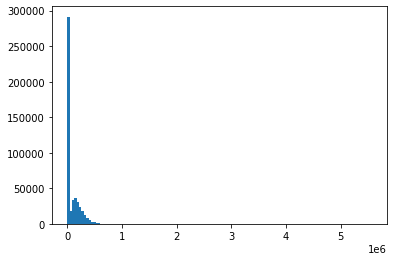

In [185]:
plt.hist(proper_d1_list,  bins=128)

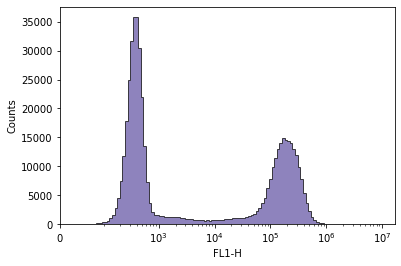

In [186]:
FlowCal.plot.hist1d(d1, channel='FL1-H', alpha=0.7, bins=128)

In [187]:
cut_d_proper_d1 = []

for i in range(len(proper_d1_list)):
    if proper_d1_list[i] >10000:
        cut_d_proper_d1.append(proper_d1_list[i])
    i=i+1    
        
cut_d_proper_d1


[84671.3984375,
 55325.6015625,
 160013.5,
 145377.0,
 330309.59375,
 177742.296875,
 129212.703125,
 247662.59375,
 238093.90625,
 238304.796875,
 51463.1015625,
 206551.40625,
 157605.59375,
 94329.296875,
 119663.3984375,
 162797.59375,
 54861.5,
 554470.3125,
 44393.30078125,
 191676.703125,
 32505.0,
 303954.09375,
 66838.203125,
 25757.5,
 61890.0,
 194595.703125,
 235875.90625,
 206167.796875,
 176918.5,
 88293.8984375,
 289696.8125,
 243543.09375,
 184908.59375,
 222113.90625,
 232851.5,
 341940.5,
 43240.6015625,
 298415.40625,
 198885.59375,
 260789.5,
 130406.296875,
 96052.703125,
 246369.0,
 79554.1015625,
 185430.59375,
 428157.5,
 168322.0,
 80939.703125,
 28391.400390625,
 87643.8984375,
 305867.5,
 99374.5,
 396597.90625,
 139976.796875,
 76004.5,
 117055.3984375,
 380733.59375,
 96310.296875,
 260916.703125,
 249497.0,
 342754.09375,
 110494.6015625,
 179669.5,
 185586.0,
 117143.3984375,
 132667.90625,
 167419.5,
 71695.5,
 445343.8125,
 236790.5,
 234136.796875,
 17

In [188]:
print(len(cut_d_proper_d1))
print(min(cut_d_proper_d1))
print(max(cut_d_proper_d1))


205775
10002.7001953125
5565694.5


In [189]:
cut_d_proper_d2 = []

for i in range(len(proper_d2_list)):
    if proper_d2_list[i] >10000:
        cut_d_proper_d2.append(proper_d2_list[i])
    i=i+1    
        
cut_d_proper_d2


[124354.8984375,
 132310.40625,
 164870.203125,
 46378.19921875,
 116662.6015625,
 135541.90625,
 169758.5,
 313040.3125,
 162593.0,
 195803.09375,
 59306.3984375,
 180650.203125,
 114246.5,
 82033.3984375,
 71733.1015625,
 163864.09375,
 155630.203125,
 134204.40625,
 64871.69921875,
 171533.796875,
 143628.796875,
 120347.0,
 88381.796875,
 109593.296875,
 138632.59375,
 202731.796875,
 136020.0,
 169193.703125,
 206241.703125,
 178234.59375,
 150763.90625,
 76450.8984375,
 130661.1015625,
 162127.0,
 143990.59375,
 147341.203125,
 258979.59375,
 183251.703125,
 173791.90625,
 137231.703125,
 95063.8984375,
 139372.5,
 163024.90625,
 189943.0,
 225908.703125,
 134037.296875,
 164340.0,
 206851.796875,
 111574.1015625,
 120461.3984375,
 114759.6015625,
 146049.703125,
 213432.09375,
 134926.203125,
 107818.8984375,
 245992.703125,
 189642.296875,
 188757.5,
 111270.203125,
 28990.599609375,
 89450.703125,
 212724.59375,
 118654.5,
 121827.703125,
 125533.5,
 113343.203125,
 185136.5,


In [190]:
print(len(cut_d_proper_d2))
print(min(cut_d_proper_d2))
print(max(cut_d_proper_d2))

130738
10000.599609375
2308699.0


In [157]:
stats.ks_2samp(cut_d_proper_d1, cut_d_proper_d2)

KstestResult(statistic=0.19860113017762204, pvalue=0.0, statistic_location=221800.40625, statistic_sign=-1)

In [158]:
d3 = FlowCal.io.FCSData('02-blank-C4-3.fcs')

d3_fl1 = d3[:, ['FL1-H']]
d3_list = d3_fl1.data.tolist()
print(d3_list[0][0])

proper_d3_list = []
for i in range(len(d3_list)):
    proper_d3_list.append(d3_list[i][0])
    
print(proper_d3_list[:100])
print(type(proper_d3_list[:100]))

print(stats.ks_2samp(proper_d1_list, proper_d3_list))



d4 = FlowCal.io.FCSData('02-blank-C4-4.fcs')

d4_fl1 = d4[:, ['FL1-H']]
d4_list = d4_fl1.data.tolist()
print(d4_list[0][0])

proper_d4_list = []
for i in range(len(d4_list)):
    proper_d4_list.append(d4_list[i][0])
    
print(proper_d4_list[:100])
print(type(proper_d4_list[:100]))

print(stats.ks_2samp(proper_d1_list, proper_d4_list))

print(stats.ks_2samp(proper_d2_list, proper_d3_list))
print(stats.ks_2samp(proper_d2_list, proper_d4_list))
print(stats.ks_2samp(proper_d3_list, proper_d4_list))


56588.30078125
[56588.30078125, 181867.203125, 34720.19921875, 3074.800048828125, 243.0, 7340.2998046875, 65783.3984375, 137855.0, 926.4000244140625, 354762.59375, 90182.0, 486.5, 86396.1015625, 180506.203125, 373523.3125, 121650.0, 390.3999938964844, 333.5, 39579.30078125, 509.70001220703125, 3668.60009765625, 590.9000244140625, 285736.3125, 317.3999938964844, 433.1000061035156, 445.5, 364.8999938964844, 309787.59375, 287974.3125, 3802.300048828125, 279875.3125, 3244.300048828125, 389.0, 77994.703125, 53884.3984375, 84001.796875, 4044.39990234375, 305009.1875, 113849.0, 437649.90625, 341534.8125, 292744.1875, 45190.69921875, 245026.0, 361.8999938964844, 428176.40625, 5159.89990234375, 364772.59375, 47516.8984375, 143590.0, 100152.5, 457964.09375, 213984.59375, 563.2000122070312, 220305.40625, 58585.19921875, 308.1000061035156, 24866.5, 128195.3984375, 231788.90625, 371.6000061035156, 211851.09375, 18280.900390625, 219729.40625, 935.7000122070312, 469.70001220703125, 453724.3125, 379.2

In [159]:
cut_d_proper_d3 = []

for i in range(len(proper_d3_list)):
    if proper_d3_list[i] >10000:
        cut_d_proper_d3.append(proper_d3_list[i])
    i=i+1    
        
cut_d_proper_d3


[56588.30078125,
 181867.203125,
 34720.19921875,
 65783.3984375,
 137855.0,
 354762.59375,
 90182.0,
 86396.1015625,
 180506.203125,
 373523.3125,
 121650.0,
 39579.30078125,
 285736.3125,
 309787.59375,
 287974.3125,
 279875.3125,
 77994.703125,
 53884.3984375,
 84001.796875,
 305009.1875,
 113849.0,
 437649.90625,
 341534.8125,
 292744.1875,
 45190.69921875,
 245026.0,
 428176.40625,
 364772.59375,
 47516.8984375,
 143590.0,
 100152.5,
 457964.09375,
 213984.59375,
 220305.40625,
 58585.19921875,
 24866.5,
 128195.3984375,
 231788.90625,
 211851.09375,
 18280.900390625,
 219729.40625,
 453724.3125,
 146223.40625,
 11735.0,
 146638.40625,
 487130.59375,
 256604.09375,
 114954.203125,
 135586.0,
 249451.296875,
 407189.6875,
 358524.59375,
 245176.296875,
 85521.1015625,
 224469.5,
 161124.90625,
 44675.6015625,
 160758.296875,
 147594.296875,
 232739.296875,
 274196.3125,
 284373.0,
 520562.6875,
 247212.40625,
 13169.7998046875,
 41332.3984375,
 113129.203125,
 217465.0,
 282889.906

In [160]:
cut_d_proper_d4 = []

for i in range(len(proper_d4_list)):
    if proper_d4_list[i] >10000:
        cut_d_proper_d4.append(proper_d4_list[i])
    i=i+1    
        
cut_d_proper_d4


[276410.40625,
 10017.7001953125,
 162329.703125,
 261360.90625,
 471893.40625,
 180954.296875,
 159028.703125,
 128528.5,
 110413.8984375,
 419133.09375,
 124510.6015625,
 654317.125,
 273727.40625,
 122118.796875,
 243877.40625,
 105969.5,
 175431.40625,
 126804.1015625,
 22026.69921875,
 297118.09375,
 271913.3125,
 238998.09375,
 281647.90625,
 44334.80078125,
 268531.3125,
 181411.703125,
 213879.09375,
 46314.19921875,
 122391.5,
 157609.5,
 185916.296875,
 148345.203125,
 491829.90625,
 243201.59375,
 133634.0,
 203730.5,
 89418.203125,
 203694.90625,
 16954.5,
 297686.8125,
 223258.09375,
 319674.90625,
 259983.5,
 279576.1875,
 513496.40625,
 151675.703125,
 16279.7001953125,
 165563.703125,
 572524.1875,
 182346.90625,
 212994.703125,
 200218.796875,
 147762.203125,
 65827.5,
 138376.5,
 59682.69921875,
 192101.5,
 353861.5,
 157378.703125,
 246323.296875,
 118968.6015625,
 66153.3984375,
 35152.6015625,
 72303.296875,
 14247.0,
 123478.3984375,
 287750.40625,
 452705.90625,


In [161]:
stats.ks_2samp(cut_d_proper_d3, cut_d_proper_d4)

KstestResult(statistic=0.09470256071701066, pvalue=0.0, statistic_location=220772.90625, statistic_sign=-1)

In [162]:
stats.ks_2samp(cut_d_proper_d2, cut_d_proper_d4)

KstestResult(statistic=0.2094223930466128, pvalue=0.0, statistic_location=224945.5, statistic_sign=1)

In [163]:
stats.ks_2samp(cut_d_proper_d2, cut_d_proper_d3)

KstestResult(statistic=0.3037651681226321, pvalue=0.0, statistic_location=221641.203125, statistic_sign=1)

In [164]:
stats.ks_2samp(cut_d_proper_d1, cut_d_proper_d3)

KstestResult(statistic=0.1054531405470076, pvalue=0.0, statistic_location=240670.09375, statistic_sign=1)

In [191]:
stats.ks_2samp(cut_d_proper_d1, cut_d_proper_d4)

KstestResult(statistic=0.07097403467529508, pvalue=0.0, statistic_location=60387.80078125, statistic_sign=-1)

Text(0.5, 1.0, 'Cumulative Distribution Function (CDF) of FITC data')

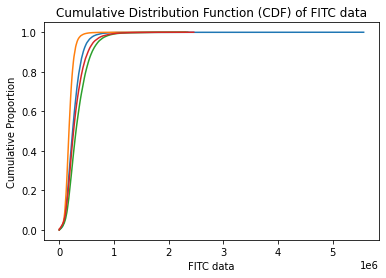

In [11]:
D= pd.DataFrame (proper_d1_list, columns = ['Data'])
data = D["Data"]

sorted_data = np.sort(data)
cumulative_data = np.cumsum(sorted_data) / np.sum(sorted_data)

import matplotlib.pyplot as plt

plt.plot(sorted_data, cumulative_data)



D2= pd.DataFrame (proper_d2_list, columns = ['Data'])
data2 = D2["Data"]

sorted_data2 = np.sort(data2)
cumulative_data2 = np.cumsum(sorted_data2) / np.sum(sorted_data2)

import matplotlib.pyplot as plt

plt.plot(sorted_data2, cumulative_data2)



D3= pd.DataFrame (proper_d3_list, columns = ['Data'])
data3 = D3["Data"]

sorted_data3 = np.sort(data3)
cumulative_data3 = np.cumsum(sorted_data3) / np.sum(sorted_data3)

import matplotlib.pyplot as plt

plt.plot(sorted_data3, cumulative_data3)




D4= pd.DataFrame (proper_d4_list, columns = ['Data'])
data4 = D4["Data"]

sorted_data4 = np.sort(data4)
cumulative_data4 = np.cumsum(sorted_data4) / np.sum(sorted_data4)

import matplotlib.pyplot as plt

plt.plot(sorted_data4, cumulative_data4)


plt.xlabel("FITC data")
plt.ylabel("Cumulative Proportion")
plt.title("Cumulative Distribution Function (CDF) of FITC data")


In [45]:
from numpy.random import seed
from numpy.random import randn
from numpy.random import lognormal
import scipy
from scipy.stats import ks_2samp
from scipy import stats
import scipy.integrate

n1 = sorted_data.shape[0]
n2 = sorted_data2.shape[0]
data_all = np.concatenate([sorted_data, sorted_data2])
cdf1 = np.searchsorted(sorted_data, data_all, side='right') / n1
cdf2 = np.searchsorted(sorted_data2, data_all, side='right') / n2
d = np.max(np.absolute(cdf1 - cdf2))
print(d)

def ecdf(data):
    """ Compute ECDF """
    x = np.sort(data)
    n = x.size
    y = np.arange(1, n+1) / n
    return(x,y)

print(ecdf(data))
print(ecdf(data2))


0.12469156044417051
(array([4.00000006e-01, 4.00000006e-01, 6.00000024e-01, ...,
       2.36814025e+06, 2.46373075e+06, 5.56569450e+06]), array([2.06277860e-06, 4.12555721e-06, 6.18833581e-06, ...,
       9.99995874e-01, 9.99997937e-01, 1.00000000e+00]))
(array([1.00000001e-01, 6.00000024e-01, 1.50000000e+00, ...,
       1.09485025e+06, 1.15416175e+06, 2.30869900e+06]), array([2.44025642e-06, 4.88051284e-06, 7.32076927e-06, ...,
       9.99995119e-01, 9.99997560e-01, 1.00000000e+00]))


In [46]:
print(type(cdf1))
print(type(np. asarray(ecdf(data))))


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [52]:
abs(np.subtract(np. asarray(ecdf(data)), np. asarray(ecdf(data2))))

ValueError: operands could not be broadcast together with shapes (2,484783) (2,409793) 

In [53]:
from sympy import Interval, Union

Interval(np. asarray(ecdf(data2)),np. asarray(ecdf(data))).sup

SympifyError: SympifyError: array([[1.00000001e-01, 6.00000024e-01, 1.50000000e+00, ...,
        1.09485025e+06, 1.15416175e+06, 2.30869900e+06],
       [2.44025642e-06, 4.88051284e-06, 7.32076927e-06, ...,
        9.99995119e-01, 9.99997560e-01, 1.00000000e+00]])

In [23]:
d2 = np.max(np.absolute(ecdf(data) - ecdf(data2)))


TypeError: unsupported operand type(s) for -: 'tuple' and 'tuple'

In [161]:
import math

print(sorted_data.size)

critical_value= 1.36/math.sqrt(sorted_data.size)
print(critical_value)

d3 = np.max(np.absolute(ecdf(data) - cdf1))


484783
0.001953283211934081


ValueError: operands could not be broadcast together with shapes (2,484783) (894576,) 

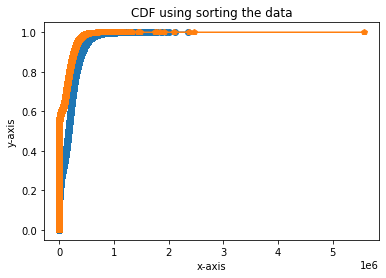

In [173]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

D3= pd.DataFrame (proper_d3_list, columns = ['Data'])
data = D3["Data"]

# No of data points used
N = len(data)
  
# sort the data in ascending order
x = np.sort(data)
  
# get the cdf values of y
y = np.arange(N) / float(N)
  
# plotting
plt.xlabel('x-axis')
plt.ylabel('y-axis')
  
plt.title('CDF using sorting the data')
  
plt.plot(x, y, marker='o')


D= pd.DataFrame (proper_d1_list, columns = ['Data'])
data = D["Data"]

# No of data points used
N = len(data)
  
# sort the data in ascending order
x = np.sort(data)
  
# get the cdf values of y
y = np.arange(N) / float(N)
  
plt.plot(x, y, marker='p')


The CDF result is- [0.00000000e+00 2.06278286e-06 4.12556572e-06 ... 9.99995874e-01
 9.99997937e-01 1.00000000e+00]


Text(0, 0.5, 'p')

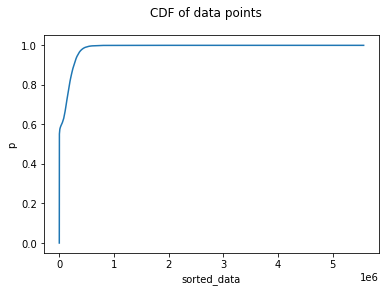

In [118]:
D= pd.DataFrame (proper_d1_list, columns = ['Data'])
data = D["Data"]

sorted_data = np.sort(data)
p = 1. * np.arange(len(sorted_data)) / float(len(sorted_data) - 1)
print("The CDF result is-",p)

fig = plt.figure()
fig.suptitle('CDF of data points')
ax2 = fig.add_subplot(111)
ax2.plot(sorted_data, p)
ax2.set_xlabel('sorted_data')
ax2.set_ylabel('p')
